In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json

In [ ]:
## randomized search
num_models = 8
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()
    config["model_folder"] = "cv_weights"
    config["experiment_name"] = "cv_run/tmodel"
    config["run"] = "cv_run"

    param_grid = {
        "d_ff": [64, 128, 256, 512],
        "d_d": [512, 1024],
        "Nx": [2, 4, 6],
        "n_head": [2, 4],
        "dropout": [0.1, 0.2, 0.5]
    }
    config["tgt_step"] = k-1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = 5*10**-5, n_epoch = 40, param_grid = param_grid)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

In [ ]:
## Multiple model training
cfg = get_config()
num_models = 8

for k in range(1, num_models+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()

    for param_name in param_grid.keys():
        cfg[param_name] = best_model_params[k-1][param_name]

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    model = train_model(cfg)

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

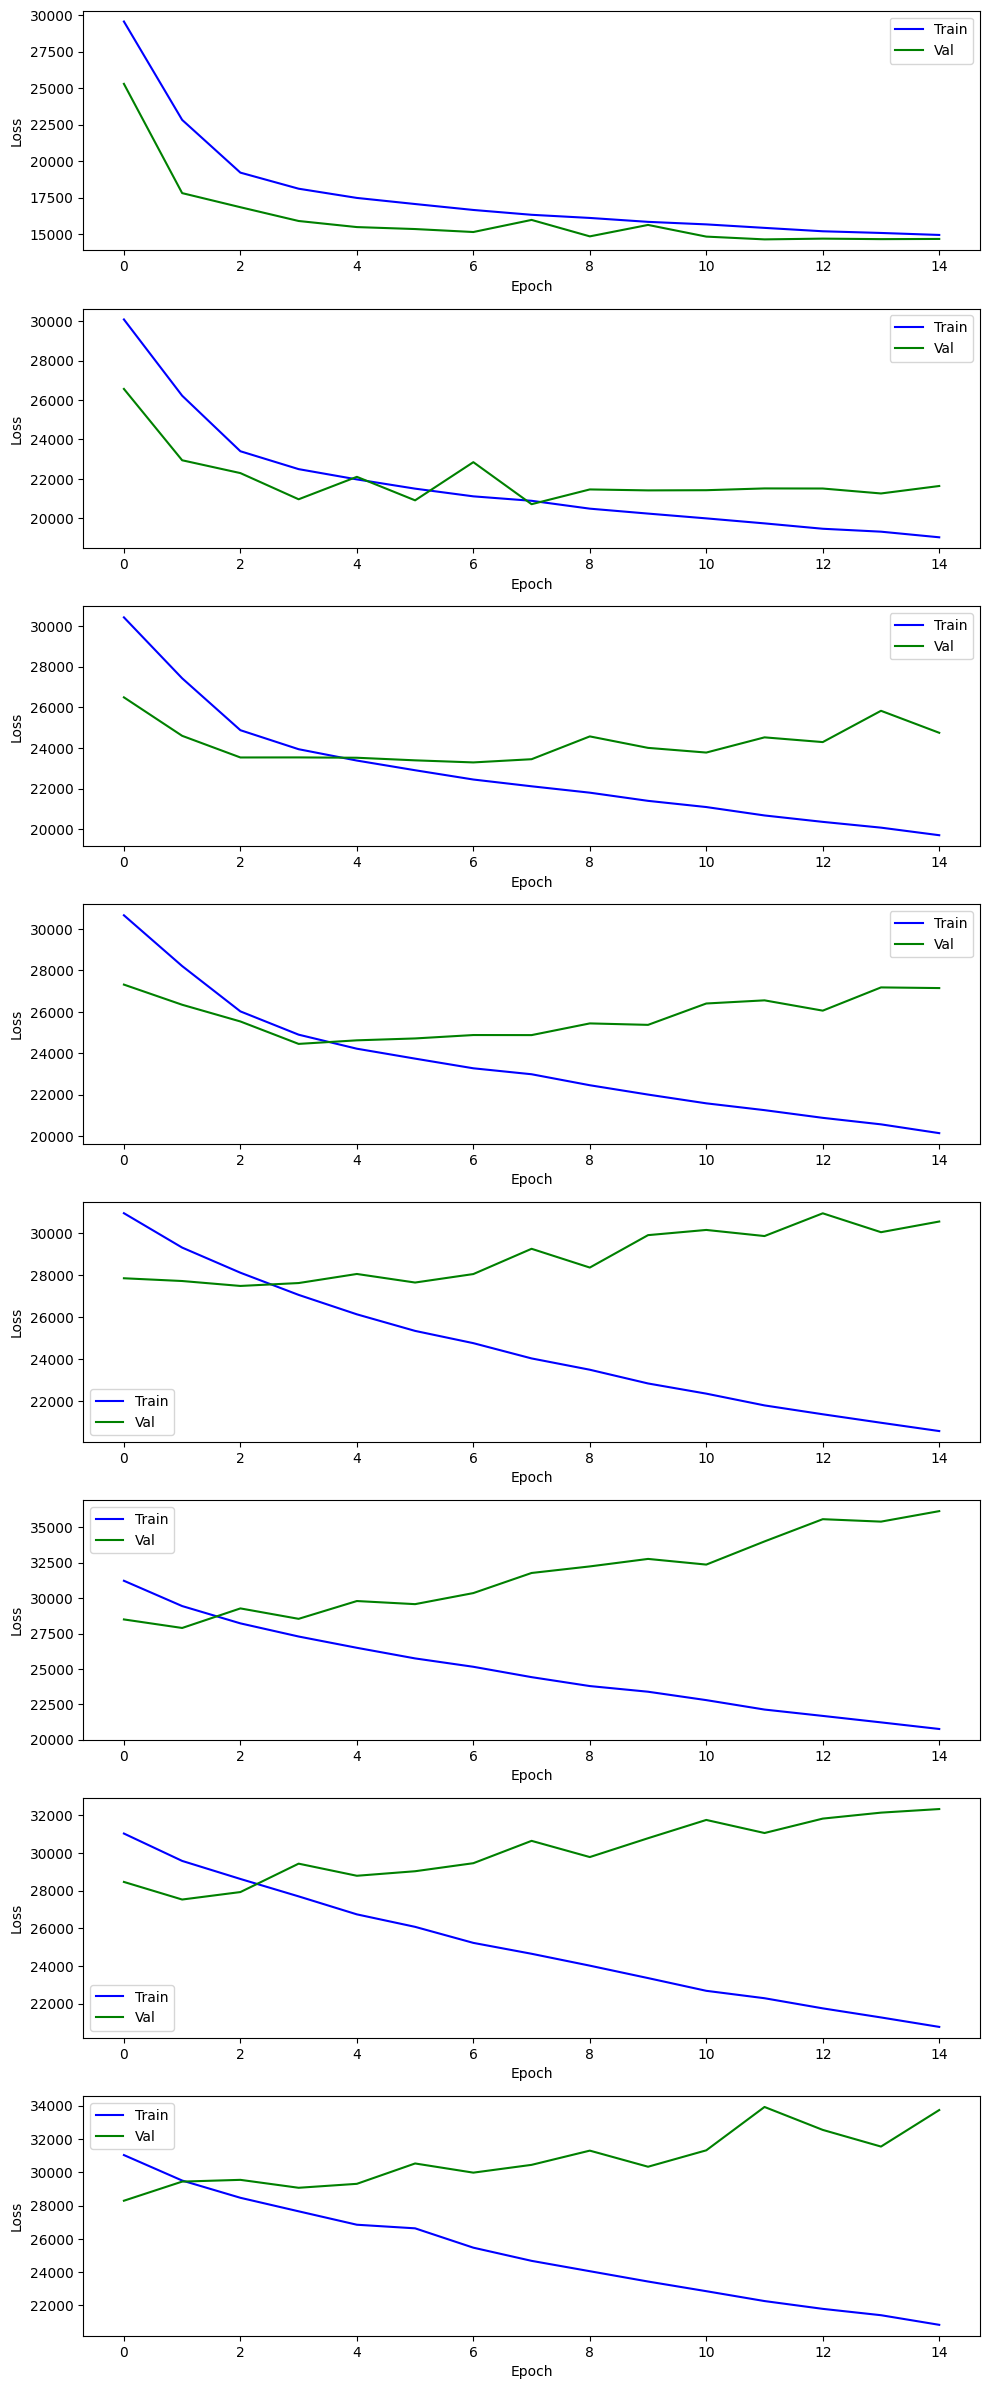

In [5]:
num_models = 8
inference_helpers.arrange_figures_in_rows(n_rows=num_models, prefix="XY")